In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from pyclustering.cluster.clarans import clarans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

##Kmeans

In [67]:
def Kmeans(df,scaler_encoder,metric):

  ks=range(2,10)
  max_score=0
  best_k=0
  best_init=[]
  best_cluster_result=[]

  initList=['k-means++', 'random']

  for k in ks:
    for init in initList:
      result_cluster=KMeans(n_clusters=k,init=init).fit_predict(df)
      score = silhouette_score(df,result_cluster,metric=metric)
      if score > max_score:
        max_score=score
        best_k=k
        best_init.append(init)
        best_cluster_result=[]
        best_cluster_result.extend(result_cluster)

  colname=df.columns.values
    
  count=0
  # Set figure size
  fig,axes = plt.subplots(9,4,constrained_layout=True, figsize=(15, 20))
  fig.suptitle('K-Means clustering / '+scaler_encoder)

  # i,k loop to select two features
  for i in range(0, len(colname)-1):
      for k in range(i+1,len(colname)):
          row=int(count/4)
          col=int(count%4)
        
          axes[row,col].set_title("K value = {} best_init={}".format(best_k,best_init))
          count+=1
          # label subplot
          axes[row,col].set_xlabel(colname[i])
          axes[row,col].set_ylabel(colname[k])
          # Visualize cluster with scatter plot
          axes[row,col].scatter(df.iloc[:,i], df.iloc[:,k], c=best_cluster_result,s=2)  

  plt.show()
  return max_score

##EM

In [68]:
# Function for EM clustering
def EM(df,scaler_encoder,metric):
  ks=range(2,10)
  max_score=0
  best_k=0
  best_cluster_result=[]
  for k in ks:
      result_cluster=GaussianMixture(n_components=k).fit_predict(df)
      score = silhouette_score(df,result_cluster,metric=metric)
      if score > max_score:
        max_score=score
        best_k=k
        best_cluster_result=[]
        best_cluster_result.extend(result_cluster)

  colname=df.columns.values
    
  count=0
  # Set figure size
  fig,axes = plt.subplots(9,4,constrained_layout=True, figsize=(15, 20))
  fig.suptitle('EM clustering / '+scaler_encoder)

  # i,k loop to select two features
  for i in range(0, len(colname)-1):
      for k in range(i+1,len(colname)):
          row=int(count/4)
          col=int(count%4)
        
          axes[row,col].set_title("K value = {}".format(best_k))
          count+=1
          # label subplot
          axes[row,col].set_xlabel(colname[i])
          axes[row,col].set_ylabel(colname[k])
          # Visualize cluster with scatter plot
          axes[row,col].scatter(df.iloc[:,i], df.iloc[:,k], c=best_cluster_result,s=2)  

  plt.show()
  return max_score

##CLARANS

In [69]:
# Function for CLARANS clustering
def CLARANS(df,scaler_encoder,metric):

  #Sampling data for CLARANS (CLARANS takes too much resources)
  sample_df = df.sample(frac=0.01,random_state=10)

  max_score=0
  best_k=0
  best_numlocal=0
  best_maxneighbor=0
  best_cluster_result=[]
  # define range of kvalues for combinations
  ks=range(2,12)
  numlocalList=[5,10]
  maxneighborList=[5,10]

  for k in ks:
    for numlocal in numlocalList:
      for maxneighbor in maxneighborList:
        # Conduct CLARANS
        claran=clarans(sample_df.values.tolist(),number_clusters=k,numlocal=numlocal,maxneighbor=maxneighbor).process()
        cluster_list=claran.get_clusters()
        result_cluster=[]

        # Get list of assigned cluster for each records
        for index in range(len(sample_df)):
          for cluster_num in range(len(cluster_list)):
            if index in cluster_list[cluster_num]:
              result_cluster.append(k)
              break
      # Find best silhouette score
      score = silhouette_score(sample_df,result_cluster,metric=metric)
      if score > max_score:
        max_score=score
        best_k=k
        best_numlocal=numlocal
        best_maxneighbor=maxneighbor
        best_cluster_result=[]
        best_cluster_result.extend(result_cluster)

  colname=sample_df.columns.values
    
  count=0
  # Set figure size
  fig,axes = plt.subplots(9,4,constrained_layout=True, figsize=(15, 20))
  fig.suptitle('CLARANS clustering / '+scaler_encoder)

  # i,k loop to select two features
  for i in range(0, len(colname)-1):
      for k in range(i+1,len(colname)):
          row=int(count/4)
          col=int(count%4)
        
          axes[row,col].set_title("K value = {} numlocal={} maxneighbor={}".format(best_k,best_numlocal,best_maxneighbor))
          count+=1
          # label subplot
          axes[row,col].set_xlabel(colname[i])
          axes[row,col].set_ylabel(colname[k])
          # Visualize cluster with scatter plot
          axes[row,col].scatter(sample_df.iloc[:,i], sample_df.iloc[:,k], c=best_cluster_result,s=2)  

  plt.show()
  return max_score

##DBSCAN


In [70]:
#Function for DBSCAN clustering
def DBSCAN(df,scaler_encoder,metric):
  max_score=0
  best_eps=0
  best_min_sample=0
  best_cluster_result=[]

  # define params for combinations
  epsList=[0.5,1,3,5]
  minSampleList=[5,10,20]
  for eps in epsList:
    for min_sample in minSampleList:
      # conduct DBSCAN
      result_cluster=DBSCAN(eps=eps,min_samples=min_sample).fit_predict(df)
      score = silhouette_score(df,result_cluster,metric=metric)
      # find best silhouette score
      if score > max_score:
        max_score=score
        best_eps=eps
        best_min_sample=min_sample
        best_cluster_result=[]
        best_cluster_result.extend(result_cluster)

  colname=df.columns.values

  count=0
  # Set figure size
  fig,axes = plt.subplots(9,4,constrained_layout=True, figsize=(15, 20))
  fig.suptitle('DBSCAN clustering / '+scaler_encoder)

  # i,k loop to select two features
  for i in range(0, len(colname)-1):
      for k in range(i+1,len(colname)):
          row=int(count/4)
          col=int(count%4)

          axes[row,col].set_title("best_eps = {} best_min_sample={}".format(best_eps,best_min_sample))
          count+=1
          # label subplot
          axes[row,col].set_xlabel(colname[i])
          axes[row,col].set_ylabel(colname[k])
          # Visualize cluster with scatter plot
          axes[row,col].scatter(df.iloc[:,i], df.iloc[:,k], c=result_cluster,s=2)  

  plt.show()
  return max_score

##MeanShift

In [71]:
# Function for MeanShift clustering
def MeanShift(df,scaler_encoder,metric):
  max_score=0
  beskt_k=0
  best_cluster_result=[]

  # define params for combinations
  bandwidthList = [1, 2, 3, 4, 5]
  for i in bandwidthList:
    result_cluster=MeanShift(bandwidth=i).fit_predict(df)
    score = silhouette_score(df,result_cluster,metric=metric)
    # find best silhouette score
    if score > max_score:
      max_score=score
      best_bandwidth=i
      best_cluster_result=[]
      best_cluster_result.extend(result_cluster)

  colname=df.columns.values
    
  count=0
  # Set figure size
  fig,axes = plt.subplots(9,4,constrained_layout=True, figsize=(15, 20))
  fig.suptitle('MeanShift clustering / '+scaler_encoder)

  # i,k loop to select two features
  for i in range(0, len(colname)-1):
      for k in range(i+1,len(colname)):
          row=int(count/4)
          col=int(count%4)
        
          axes[row,col].set_title("best_bandwidth = {}".format(best_bandwidth))
          count+=1
          # label subplot
          axes[row,col].set_xlabel(colname[i])
          axes[row,col].set_ylabel(colname[k])
          # Visualize cluster with scatter plot
          axes[row,col].scatter(df.iloc[:,i], df.iloc[:,k], c=best_cluster_result,s=2)  

  plt.show()
  return max_score

#Function 'AutoClustering' definition

In [72]:

# Define function that finds best model
def AutoClustering(df, algorithms, scalers , encoders ,metric) :
    # Extract X,y
    # X = df.drop(target, axis=1)
    # y = df[target]
    
    possible_model=['Kmeans', 'EM', 'CLARANS', 'DBSCAN', 'MeanShift']
    possible_encoder=[OrdinalEncoder(),LabelEncoder()]
    possible_scaler=[StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

    # Exception handling for algorithms
    for i in  algorithms:
      if i not in possible_model:
        print('ERROR: Undefined algorithm included in list, possible algorithms = ['+ ','.join(possible_model)+']')
        return 


    # Seperate categorical/numerical data
    df_category = df.select_dtypes(include = 'object')
    df_cateEmpty = df_category.empty
    df_num = df.select_dtypes(exclude = 'object')
    df_numEmpty = df_num.empty 
    
    # variables for saving
    model_best_plt=[]
    best_plt=[]
    best_kmeans_score=0
    best_EM_score=0
    best_CLARANS_score=0
    best_DBSCAN_score=0
    best_MeanShift_score=0

    for model in algorithms:

      best_accuracy = 0
      besk_k = 0
      best_param = []
      best_scaler_encoder = []

      for scaler in scalers:

        for encoder in encoders:

          num_colname=df_num.columns.values
          cat_colname=df_category.columns.values
          final_df=pd.DataFrame()

          # Encoding and Scaling of each method

          if df_cateEmpty is False :
            if encoder == 'OrdinalEncoder' :
              encoded = pd.DataFrame(OrdinalEncoder().fit_transform(df_category),columns=cat_colname)
              final_df = pd.concat([final_df,encoded], axis=1)

            elif encoder == 'LabelEncoder' :
              encoded = pd.DataFrame(LabelEncoder().fit_transform(df_category),columns=cat_colname)
              final_df = pd.concat([final_df, encoded], axis=1)

            elif encoder == None:
              final_df = pd.concat([final_df, df_category], axis=1)

                
          if df_numEmpty is False :
            if scaler == None:
                final_df = pd.concat([final_df, df_num], axis=1)
            else:
                scaled = pd.DataFrame(scaler.fit_transform(df_num),columns=num_colname)
                final_df = pd.concat([final_df, scaled], axis=1)
        

          final_df.dropna(inplace=True)

          # pca = PCA(n_components=2)  # Reduce feature with PCA
          # final_df = pd.DataFrame(pca.fit_transform(final_df))
          scaler_encoder = str(str(scaler)[:-2]+','+encoder)
          # Conduct clustering
          if model == 'Kmeans':
            score = Kmeans(final_df,scaler_encoder,metric)
            if score > best_kmeans_score:
                best_kmeans_score = score

          elif model == 'EM':
            score = EM(final_df,scaler_encoder,metric)
            if score > best_EM_score:
                best_EM_score = score            

          elif model == 'CLARANS':
            score = CLARANS(final_df,scaler_encoder,metric)
            if score > best_CLARANS_score:
                best_CLARANS_score = score

          elif model == 'DBSCAN':
            plt,score = DBSCAN(final_df,scaler_encoder,metric)
            if score > best_DBSCAN_score:
                best_DBSCAN_score = score
              
          elif model == 'MeanShift':
            plt,score = MeanShift(final_df,scaler_encoder,metric)
            if score > best_MeanShift_score:
                best_MeanShift_score = score

      
      # model_best_plt.append(best_plt)
      # best_plt=[]

    return 1 #model_best_plt


In [73]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningHW/Lab2/housing.csv')
pca = PCA(n_components=2)  # Reduce feature for plotting
df_colname=df.columns.values
df = pd.DataFrame(OrdinalEncoder().fit_transform(df),columns=df_colname)

df.dropna(axis=1,inplace=True)
dataset = pd.DataFrame(pca.fit_transform(df))
print(dataset)

                 0            1
0      6460.388992 -2575.502399
1      6893.354007  2451.700172
2      5935.391395 -1921.954866
3      4269.356476 -1871.390494
4       803.818082 -1196.957640
...            ...          ...
20635 -5464.590150  -328.844946
20636 -3217.315964 -1664.805752
20637 -5075.154578   231.010176
20638 -4783.321024  -283.045996
20639 -3348.414104   709.684701

[20640 rows x 2 columns]


#Main of source code

In [74]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningHW/Lab2/housing.csv')
print(df.shape)

(20640, 10)


##Data exploration

In [75]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [76]:
#statistics about data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [77]:
# Check value distribution of each features
for i in df.columns:
    print('Value distribution of',i)
    print(df[i].value_counts(sort=True, ascending=False))
    print('\n\n')


Value distribution of longitude
-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: longitude, Length: 844, dtype: int64



Value distribution of latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: latitude, Length: 862, dtype: int64



Value distribution of housing_median_age
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.

In [78]:
# check null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##Dirty data cleaning

###Drop null values
  





In [79]:
# Preprocessing
df.dropna(inplace=True)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##Feature engineering
###Plot correlation matrix

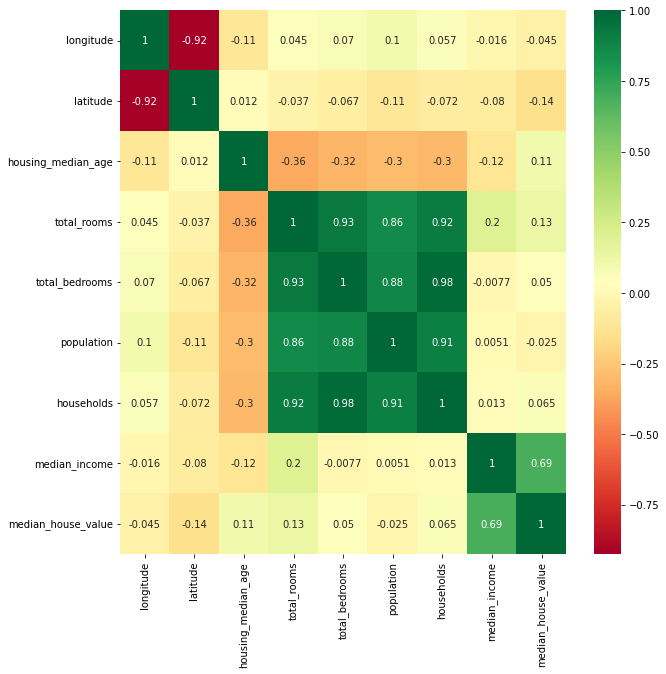

In [80]:
#Check correlations of features in the dataset
corrmat = df.corr() #corr() computes pairwise correlations of features in a DataFrame
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot the heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###Drop feature 'median_house_value' for clustering (Unsupervised learning)
  *   Used as target for supervied learnings

In [81]:
# drop 'median_house_value'
final_df = df.drop(['median_house_value'], axis = 1)
final_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


##Prepare combination list for scaling, encoding and models

In [82]:
# Define scalers, encoders list 
scalerList= [ StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
encoderList= [ 'OrdinalEncoder', 'LabelEncoder']

# Define algorithms list
algoList = ['Kmeans', 'EM', 'CLARANS', 'DBSCAN', 'MeanShift']
wrong_algoList = [ 'DecisionTree']

# Define metric parameter
metric=['euclidean','manhatten']

final_df=final_df.sample(frac=0.1,random_state=20)




## Call Function 

In [83]:
#Call function with wrong params example

result=AutoClustering(final_df, wrong_algoList, scalerList, encoderList,metric[0])

ERROR: Undefined algorithm included in list, possible algorithms = [Kmeans,EM,CLARANS,DBSCAN,MeanShift]


In [84]:
#Call function for analysis
result=AutoClustering(final_df, algoList, scalerList, encoderList,metric[0])

Output hidden; open in https://colab.research.google.com to view.

##Analysis result